## Imports


In [1]:
from numpy import pi

import qutip as qt

from rich import print as pprint

from oqd_compiler_infrastructure import PrettyPrint, Post, FixedPoint, Chain, In, Pre

from oqd_core.compiler.math.passes import simplify_math_expr, evaluate_math_expr


from oqd_core.compiler.math.rules import (
    DistributeMathExpr,
    ProperOrderMathExpr,
    PartitionMathExpr,
    PrintMathExpr,
)


from trical.light_matter2 import *
from trical.backend2.qutip.codegen import QutipCodeGeneration
from trical.backend2.qutip.vm import QutipVM

## Atomic Circuit


In [2]:
downstate = Level(
    principal=6,
    spin=1 / 2,
    orbital=0,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=0,
    spin_orbital_nuclear_magnetization=0,
    energy=2 * np.pi * 0,
)
upstate = Level(
    principal=6,
    spin=1 / 2,
    orbital=0,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=1,
    spin_orbital_nuclear_magnetization=0,
    energy=2 * np.pi * 10,
)
estate = Level(
    principal=5,
    spin=1 / 2,
    orbital=1,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=1,
    spin_orbital_nuclear_magnetization=-1,
    energy=2 * np.pi * 100,
)
estate2 = Level(
    principal=5,
    spin=1 / 2,
    orbital=1,
    nuclear=1 / 2,
    spin_orbital=1 / 2,
    spin_orbital_nuclear=1,
    spin_orbital_nuclear_magnetization=1,
    energy=2 * np.pi * 200,
)

transitions = [
    Transition(
        level1=downstate,
        level2=estate,
        einsteinA=1,
        multipole="E1",
    ),
    Transition(
        level1=downstate,
        level2=estate2,
        einsteinA=1,
        multipole="E1",
    ),
    Transition(
        level1=upstate,
        level2=estate,
        einsteinA=1,
        multipole="E1",
    ),
    Transition(
        level1=upstate,
        level2=estate2,
        einsteinA=1,
        multipole="E1",
    ),
]

Yb171 = Ion(
    mass=171,
    charge=1,
    position=[0, 0, 0],
    levels=[downstate, upstate, estate, estate2],
    transitions=transitions,
)

COM_x = Phonon(energy=0.1, eigenvector=[1, 0, 0])

system = System(
    ions=[
        Yb171,
    ],
    modes=[
        COM_x,
    ],
)

beam = Beam(
    transition=transitions[0],
    rabi=2 * np.pi * 5,
    detuning=2 * np.pi * 25,
    phase=0,
    polarization=[1, 1, 0],
    wavevector=[0, 1, 0],
    target=0,
)

beam2 = Beam(
    transition=transitions[2],
    rabi=2 * pi * 5,
    detuning=2 * np.pi * 25,
    phase=0,
    polarization=[1, 1, 0],
    wavevector=[0, 1, 0],
    target=0,
)

protocol = ParallelProtocol(
    sequence=[
        Pulse(beam=beam, duration=10),
        Pulse(beam=beam2, duration=6),
    ]
)

circuit = AtomicCircuit(system=system, protocol=protocol)

## Construct Hamiltonian


In [3]:
compiler = Post(ConstructHamiltonian())

op = compiler(circuit)

printer = Post(PrettyPrint())
pprint(printer(op))

AtomicEmulatorCircuit
  - base: OperatorAdd
    - op1: OperatorAdd
      - op1: Zero
      - op2: OperatorKron
        - op1: OperatorAdd
          - op1: OperatorAdd
            - op1: OperatorAdd
              - op1: OperatorAdd
                - op1: Zero
                - op2: OperatorScalarMul
                  - op: KetBra
                    - ket: int(0)
                    - bra: int(0)
                  - coeff: WaveCoefficient
                    - amplitude: MathNum
                      - value: float(0.0)
                    - frequency: MathNum
                      - value: int(0)
                    - phase: MathNum
                      - value: int(0)
              - op2: OperatorScalarMul
                - op: KetBra
                  - ket: int(1)
                  - bra: int(1)
                - coeff: WaveCoefficient
                  - amplitude: MathNum
                    - value: float(62.83185307179586)
                  - frequency: MathNum
                    - value: int(0)
                  - phase: MathNum
                    - value: int(0)
            - op2: OperatorScalarMul
              - op: KetBra
                - ket: int(2)
                - bra: int(2)
              - coeff: WaveCoefficient
                - amplitude: MathNum
                  - value: float(628.3185307179587)
                - frequency: MathNum
                  - value: int(0)
                - phase: MathNum
                  - value: int(0)
          - op2: OperatorScalarMul
            - op: KetBra
              - ket: int(3)
              - bra: int(3)
            - coeff: WaveCoefficient
              - amplitude: MathNum
                - value: float(1256.6370614359173)
              - frequency: MathNum
                - value: int(0)
              - phase: MathNum
                - value: int(0)
        - op2: Identity
    - op2: OperatorKron
      - op1: Identity
      - op2: OperatorScalarMul
        - op: OperatorMul
          - op1: Creation
          - op2: Annihilation
        - coeff: WaveCoefficient
          - amplitude: MathNum
            - value: float(0.1)
          - frequency: MathNum
            - value: int(0)
          - phase: MathNum
            - value: int(0)
  - sequence: list
    - 0: AtomicEmulatorGate
      - hamiltonian: OperatorAdd
        - op1: OperatorAdd
          - op1: Zero
          - op2: OperatorKron
            - op1: OperatorAdd
              - op1: OperatorAdd
                - op1: OperatorAdd
                  - op1: OperatorAdd
                    - op1: Zero
                    - op2: OperatorScalarMul
                      - op: OperatorAdd
                        - op1: KetBra
                          - ket: int(0)
                          - bra: int(2)
                        - op2: KetBra
                          - ket: int(2)
                          - bra: int(0)
                      - coeff: CoefficientAdd
                        - coeff1: WaveCoefficient
                          - amplitude: MathDiv
                            - expr1: MathDiv
                              - expr1: MathMul
                                - expr1: MathMul
                                  - expr1: MathNum
                                    - value: float(111413.60835451509)
                                  - expr2: MathPow
                                    - expr1: MathDiv
                                      - expr1: MathMul
                                        - expr1: MathNum
                                          - value: int(2)
                                        - expr2: MathMul
                                          - expr1: MathNum
                                            - value: float(0.0013272093648958553)
                                          - expr2: MathPow
                                            - expr1: MathDiv
                                              - expr1: MathMul
                                                

### Simplification


In [ ]:
from trical.light_matter2.canonicalize import Prune, PruneZeroPowers

simplify = Chain(
    Chain(
        FixedPoint(Post(DistributeMathExpr())),
        FixedPoint(Post(ProperOrderMathExpr())),
        FixedPoint(Post(PartitionMathExpr())),
        FixedPoint(Post(PruneZeroPowers())),
    ),
    simplify_math_expr,
    FixedPoint(Post(Prune())),
    Chain(
        FixedPoint(Post(DistributeMathExpr())),
        FixedPoint(Post(ProperOrderMathExpr())),
        FixedPoint(Post(PartitionMathExpr())),
        FixedPoint(Post(PruneZeroPowers())),
    ),
    simplify_math_expr,
)

## Qutip Intepreter


In [5]:
def qutip_compiler(circuit, fock_cutoff=1):
    analysis = In(AnalyseHilbertSpace())

    analysis(circuit)

    hilbert_space = analysis.children[0].hilbert_space

    compiler = Chain(
        Post(ConstructHamiltonian()),
        simplify,
        Post(QutipCodeGeneration(fock_cutoff=fock_cutoff)),
    )

    compiled_circuit = compiler(circuit)

    return compiled_circuit, hilbert_space, fock_cutoff


def qutip_intepreter(compiled_circuit, hilbert_space, fock_cutoff, timestep):
    vm = Pre(
        QutipVM(
            hilbert_space=hilbert_space,
            fock_cutoff=fock_cutoff,
            timestep=timestep,
        )
    )

    vm(compiled_circuit)

    return vm.children[0].result

In [6]:
compiled_circuit, hilbert_space, fock_cutoff = qutip_compiler(circuit, 10)

printer = Post(PrettyPrint())
pprint(printer(compiled_circuit))

QutipExperiment
  - base: function(<function QutipCodeGeneration.map_OperatorAdd.<locals>.<lambda> at 0x0000021ECCB730A0>)
  - sequence: list
    - 0: QutipGate
      - hamiltonian: function(<function QutipCodeGeneration.map_OperatorAdd.<locals>.<lambda> at 
0x0000021ECCF42A70>)
      - duration: float(10.0)

In [7]:
result = qutip_intepreter(
    compiled_circuit,
    hilbert_space=[10, "f"],
    fock_cutoff=fock_cutoff,
    timestep=1e-2,
)

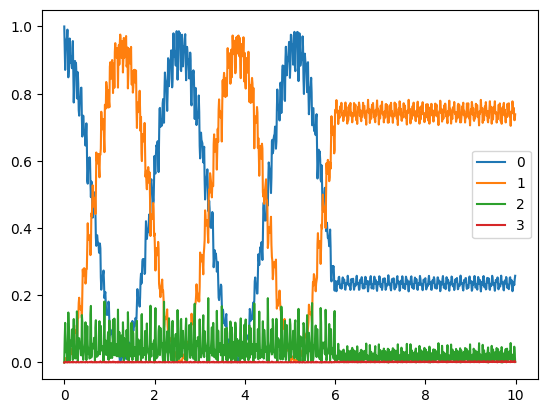

In [8]:
from matplotlib import pyplot as plt

k = slice(None, None, 1)

plt.plot(
    result["tspan"][k],
    [s.ptrace(0).diag()[:4] for s in result["states"][k]],
    label=range(4),
)

plt.legend()